Chris Richardson <br><br>

Sep 18, 2022 <br><br>

ADS-509-Fall <br><br>

Github Link: [https://github.com/CFRichardson/USD_ADS_509_HW2](https://github.com/CFRichardson/ADS_509_HW2)

<h1> ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics</h1>

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


<h1> ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics</h1>

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


# Notebook Setup

In [ ]:
import emoji
import numpy as np
import pandas as pd
import os
import re

from collections import Counter, defaultdict
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))

In [ ]:
import string
from collections import Counter

def null_ratio(dataframe):
    return dataframe.isnull().mean() * 100

In [ ]:
twitter_folder = 'wk2/ADS_509_HW2/ADS_509_HW2/twitter'
lyrics_folder = 'wk2/ADS_509_HW2/ADS_509_HW2/lyrics'

# Descriptive Stats FN

In [ ]:
def descriptive_stats(tokens, top_tokens=False, num_top_tokens = 5, verbose=False) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens,
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity),
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.
    """
    def character_counter(text):
        total_chars = 0
        for word in text:
            total_chars += len(word)
        return total_chars

    # Fill in the correct values here.
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = character_counter(tokens)

    if verbose:
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

    # print the five most common tokens
    if top_tokens:
        most_common = Counter(tokens).most_common(num_top_tokens)
        keys = [x[0] for x in most_common]
        values = [x[1] for x in most_common]

        print('**'*12, '\n', f'-----TOP {num_top_tokens} TOKENS-----')
        print(pd.DataFrame({'keys':keys, 'values':values}))

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [ ]:
text = "here is some example text with other example text here in this text".split()
assert(descriptive_stats(text, top_tokens=True, verbose=True)[0] == 13)
assert(descriptive_stats(text)[1] == 9)
assert(abs(descriptive_stats(text)[2] - 0.69) < 0.02)
assert(descriptive_stats(text)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
************************ 
 -----TOP 5 TOKENS-----
      keys  values
0     text       3
1     here       2
2  example       2
3       is       1
4     some       1


Q: Why is it beneficial to use assertion statements in your code?

A:  Similar yet different to an "If True" statement, assertions check if the provided statement within the parentheses is True; if statement is false an AssertionError is thrown and the kernel will stop running.

# Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




## Read in Lyrics

In [ ]:
cwd = '/Volumes/GoogleDrive/My Drive/_509/wk2/ADS_509_HW2/'

# Read in the lyrics data
ffdp_path = 'lyrics/FFDP/FFDP_song_lyrics_df.csv'
ffdp_lyrics_df = pd.read_csv(cwd + ffdp_path)
ffdp_lyrics_df.head(3)

,Artist,Title,Lyrics
0,FFDP,Ashes,"Right Hate, hate, hate! Bring it! You don'..."
1,FFDP,The_Way_Of_The_Fist,"Break this shit down! Zoltan, open the sky!..."
2,FFDP,Salvation,Disgusted by your weakness You have no righ...


In [ ]:
rezz_path = 'lyrics/OfficialRezz/OfficialRezz_song_lyrics_df.csv'
rezz_lyrics_df = pd.read_csv(cwd + rezz_path)
rezz_lyrics_df.head(3)

,Artist,Title,Lyrics
0,OfficialRezz,Lost,What a beautiful world to be anything but a...
1,OfficialRezz,Melancholy,All these thoughts are running through my h...
2,OfficialRezz,Relax,Just take a nice breath in. Exhale the brea...


## Read in Twitter Data

In [ ]:
# # Read in the twitter data
ffdp_path = 'twitter/FFDP_followers_data.txt'
ffdp_followers_df = pd.read_csv(cwd + ffdp_path, sep='\t', engine='python')
ffdp_followers_df = ffdp_followers_df[['Artist', 'Description']]
ffdp_followers_df.head(2)

,Artist,Description
0,FFDP,NaN
1,FFDP,A pup who loves to boop the snoot! | 27 | Pans...


In [ ]:
rezz_path = 'twitter/OfficialRezz_followers_data.txt'
rezz_followers_df = pd.read_csv(cwd + rezz_path, sep='\t', engine='python')
rezz_followers_df = rezz_followers_df[['Artist', 'Description']]
rezz_followers_df.head(2)

,Artist,Description
0,OfficialRezz,CRUZIN’ 🥺❤️💡
1,OfficialRezz,NaN


As we see, some descriptions are sadly NaNs.  Let's check out the % of NaNs in each df.

### Twitter Description Null %

#### FFDP Null %

In [ ]:
null_ratio(ffdp_followers_df)

Artist          0.000000
Description    40.418404
dtype: float64

#### Rezz Null %

In [ ]:
null_ratio(rezz_followers_df)

Artist          0.000000
Description    26.866269
dtype: float64

## NA Row Removal

In [ ]:
ffdp_followers_df = ffdp_followers_df.dropna().reset_index(drop=True)

rezz_followers_df = rezz_followers_df.dropna().reset_index(drop=True)
print(f'There are {ffdp_followers_df.shape[0]:,} rows left for FFDP after NaN removal.')
print(f'There are {rezz_followers_df.shape[0]:,} rows for Rezz left after NaN removal.')

# sanity check
null_ratio(ffdp_followers_df)

There are 59,581 rows left for FFDP after NaN removal.
There are 73,133 rows for Rezz left after NaN removal.


Artist         0.0
Description    0.0
dtype: float64

# Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [ ]:
def text_prep(text):
    punctuation = set(string.punctuation) # speeds up comparison
    # remove punctuation chars then tokenize string
    text = ''.join(char for char in text if char not in punctuation).split()
    # lowercase all
    text = [word.lower() for word in text]
    # remove stop words
    text = [word for word in text if word not in sw]

    return text

In [ ]:
ffdp_followers_df['Cleaned_Desc'] = ffdp_followers_df.loc[:,'Description'].map(text_prep)

rezz_followers_df['Cleaned_Desc'] = rezz_followers_df.loc[:,'Description'].map(text_prep)
rezz_followers_df.head(2)

,Artist,Description,Cleaned_Desc
0,OfficialRezz,CRUZIN’ 🥺❤️💡,"[cruzin’, 🥺❤️💡]"
1,OfficialRezz,@__SoCalTxOwl93 💙🦉 I'm Mr American Dream sinc...,"[socaltxowl93, 💙🦉, im, mr, american, dream, si..."


In [ ]:
ffdp_lyrics_df['Cleaned_Lyrics'] = ffdp_lyrics_df.loc[:,'Lyrics'].map(text_prep)
ffdp_lyrics_df.head(2)

,Artist,Title,Lyrics,Cleaned_Lyrics
0,FFDP,Ashes,"Right Hate, hate, hate! Bring it! You don'...","[right, hate, hate, hate, bring, dont, underst..."
1,FFDP,The_Way_Of_The_Fist,"Break this shit down! Zoltan, open the sky!...","[break, shit, zoltan, open, sky, want, got, ev..."


In [ ]:
rezz_lyrics_df['Cleaned_Lyrics'] = rezz_lyrics_df.loc[:,'Lyrics'].map(text_prep)
rezz_lyrics_df.head(2)

,Artist,Title,Lyrics,Cleaned_Lyrics
0,OfficialRezz,Lost,What a beautiful world to be anything but a...,"[beautiful, world, anything, alone, cant, find..."
1,OfficialRezz,Melancholy,All these thoughts are running through my h...,"[thoughts, running, head, cant, control, takin..."


## Empty Row Removal

In [ ]:
# create a column which holds count of tokens for description
ffdp_followers_df['Cleaned_Len'] = ffdp_followers_df['Cleaned_Desc'].map(len)
ffdp_lyrics_df['Cleaned_Len'] = ffdp_lyrics_df['Cleaned_Lyrics'].map(len)

rezz_followers_df['Cleaned_Len'] = rezz_followers_df['Cleaned_Desc'].map(len)
rezz_lyrics_df['Cleaned_Len'] = rezz_lyrics_df['Cleaned_Lyrics'].map(len)

ffdp_followers_df.head()

,Artist,Description,Cleaned_Desc,Cleaned_Len
0,FFDP,A pup who loves to boop the snoot! | 27 | Pans...,"[pup, loves, boop, snoot, 27, pansexual, domal...",15
1,FFDP,Attorney. Virginian. History and Political Nerd.,"[attorney, virginian, history, political, nerd]",5
2,FFDP,SJB\ngr.9,"[sjb, gr9]",2
3,FFDP,Inbox let have some fun 👇👇 can't wait to get y...,"[inbox, let, fun, 👇👇, cant, wait, get, message...",11
4,FFDP,I’m only interested in what's real. Real peopl...,"[i’m, interested, whats, real, real, people, r...",10


In [ ]:
def no_data_row_deleter(df):
    b4 = df.shape[0]
    df = df.loc[df['Cleaned_Len'] != 0]
    after = df.shape[0]
    dif = b4 - after
    print('--'*2,f'Dropped {dif} rows','--'*2)
    return df

In [ ]:
ffdp_followers_df = no_data_row_deleter(ffdp_followers_df)

---- Dropped 763 rows ----


In [ ]:
rezz_followers_df = no_data_row_deleter(rezz_followers_df)

---- Dropped 620 rows ----


Rezz has one song where the only word spoken is the stopword "I", in which AZLyrics has the lyrics as "I [repeated]" and nothing more.  Post data cleaning, the cleaned lyrics from the song is "[repeated]" as shown in the following cell.

In [ ]:
rezz_lyrics_df.iloc[19,:]

Artist                OfficialRezz
Title                            I
Lyrics               I [repeated] 
Cleaned_Lyrics          [repeated]
Cleaned_Len                      1
Name: 19, dtype: object

Because "repeated" is not apart of the song lyrics, the row is deleted.

In [ ]:
rezz_lyrics_df = rezz_lyrics_df.iloc[0:19,:]
rezz_lyrics_df.shape

(19, 5)

# Basic Descriptive Statistics

Call your `descriptive_stats` function on both yo›ur lyrics data and your twitter data and for both artists (four total calls).

STUDENT NOTE:  Some descriptions only contain stopwords, thus will be pointless.  Let's see how many rows are now empty due to stopword removal.

## Corpus Build & Stats

In [ ]:
# helper functions
def desc_stats_2_DF(stats, stats_of):
    df = pd.DataFrame({'stats_of':[stats_of],
                       'num_tokens':[stats[0]],
                       'num_unique_tokens':[stats[1]],
                       'lexical_diversity':[stats[2]],
                       'num_characters':[stats[3]]})
    return df

def df_corpus_maker(df, corpus_column):
    corpus = []
    for ix, row in df.iterrows():
        corpus.extend(row[corpus_column])

    return corpus

### FFDP Stats

#### FFDP Twitter Stats

In [ ]:
ffdp_twitter_corpus = df_corpus_maker(ffdp_followers_df, 'Cleaned_Desc')
ffdp_twitter_stats = descriptive_stats(ffdp_twitter_corpus, top_tokens=True, verbose=True)
ffdp_twitter_stats = desc_stats_2_DF(ffdp_twitter_stats, 'ffdp_twitter')
ffdp_twitter_stats

There are 439951 tokens in the data.
There are 91559 unique tokens in the data.
There are 2524753 characters in the data.
The lexical diversity is 0.208 in the data.
************************ 
 -----TOP 5 TOKENS-----
    keys  values
0   love    5133
1     im    4814
2  music    4045
3   life    2980
4  metal    2480


,stats_of,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,ffdp_twitter,439951,91559,0.208112,2524753


#### FFDP Lyrics Stats

In [ ]:
ffdp_lyrics_corpus = df_corpus_maker(ffdp_lyrics_df, 'Cleaned_Lyrics')
ffdp_lyrics_stats = descriptive_stats(ffdp_lyrics_corpus, top_tokens=True, verbose=True)
ffdp_lyrics_stats = desc_stats_2_DF(ffdp_lyrics_stats, 'ffdp_lyrics')
ffdp_lyrics_stats

There are 2312 tokens in the data.
There are 684 unique tokens in the data.
There are 11725 characters in the data.
The lexical diversity is 0.296 in the data.
************************ 
 -----TOP 5 TOKENS-----
    keys  values
0     im      56
1  never      53
2   cant      44
3    one      41
4   dont      38


,stats_of,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,ffdp_lyrics,2312,684,0.295848,11725


### Rezz Stats

#### Rezz Twitter Stats

In [ ]:
rezz_twitter_corpus = df_corpus_maker(rezz_followers_df, 'Cleaned_Desc')
rezz_twitter_stats = descriptive_stats(rezz_twitter_corpus, top_tokens=True, verbose=True)
rezz_twitter_stats = desc_stats_2_DF(rezz_twitter_stats, 'rezz_twitter')
rezz_twitter_stats

There are 464405 tokens in the data.
There are 107752 unique tokens in the data.
There are 2673509 characters in the data.
The lexical diversity is 0.232 in the data.
************************ 
 -----TOP 5 TOKENS-----
    keys  values
0  music    5660
1      •    4518
2   love    2762
3   life    2347
4     im    2308


,stats_of,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,rezz_twitter,464405,107752,0.232022,2673509


#### Rezz Lyrics Stats

In [ ]:
rezz_lyrics_corpus = df_corpus_maker(rezz_lyrics_df, 'Cleaned_Lyrics')
rezz_lyrics_stats = descriptive_stats(rezz_lyrics_corpus, top_tokens=True, verbose=True)
rezz_lyrics_stats = desc_stats_2_DF(rezz_lyrics_stats, 'rezz_lyrics')
rezz_lyrics_stats

There are 1304 tokens in the data.
There are 362 unique tokens in the data.
There are 6305 characters in the data.
The lexical diversity is 0.278 in the data.
************************ 
 -----TOP 5 TOKENS-----
   keys  values
0  head      43
1  take      38
2  time      36
3  lost      35
4    oh      34


,stats_of,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,rezz_lyrics,1304,362,0.277607,6305


## Stats Comparison

In [ ]:
pd.concat([ffdp_twitter_stats,
           ffdp_lyrics_stats,
           rezz_twitter_stats,
           rezz_lyrics_stats])

,stats_of,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,ffdp_twitter,439951,91559,0.208112,2524753
0,ffdp_lyrics,2312,684,0.295848,11725
0,rezz_twitter,464405,107752,0.232022,2673509
0,rezz_lyrics,1304,362,0.277607,6305


Q: How do you think the "top 5 words" would be different if we left stopwords in the data?

A: By the looks of how many rows were dropped due to the removal of stop words, totally different. Just like this week's De La Soul reference to the song <i>Me, Myself, and I</i>, Rezz too has a song in which the stop word "I" is repeated numerous times throughout the five minute song.  Thus, Rezz's song "I" most likely did not contribute to the lyrics corpus.


---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Due to the nature of both artists, I assumed that FFDP would have a far greater percentage of lexical diversity (even with just 20 songs per artist).  This is due to FFDP being a Metal band in which most of their songs have a full on story and Rezz being an Electronic music producer with most of her songs (like most electronic music) have little to no lyrics and even then, the lyrics are most of the time repeated over and over.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [ ]:
str1 = "❤️"
str2 = ":-)"

assert emoji.is_emoji(str1), '1st str Not an Emoji!'
assert emoji.is_emoji(str2), '2nd str Not an Emoji!'

AssertionError: 2nd str Not an Emoji!

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [ ]:
def top_10_emojis(corpus):
    list_of_emojis = []
    for desc in corpus:
        emoji_list = emoji.emoji_list(desc)
        list_of_emojis.extend(emoji_list)

    df = pd.DataFrame(list_of_emojis)

    # return top 10 emojis
    return df['emoji'].value_counts()[:10]

#### FFDP Emojis

In [ ]:
top_10_emojis(ffdp_twitter_corpus)

🖤     1643
❤️    1248
🤘     1227
🇺🇸     824
💙      749
❤      733
💜      671
🎸      626
✨      621
🎶      609
Name: emoji, dtype: int64

#### Rezz Emojis

In [ ]:
top_10_emojis(rezz_twitter_corpus)

✨       3277
🏳️‍🌈    1520
🖤       1448
❤️      1350
💜        972
🌈        934
🎶        886
🔥        874
👽        821
💙        781
Name: emoji, dtype: int64

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [ ]:
def hash_tag_counter(corpus):
    hash_tags = []
    for desc in corpus:
        if desc[0] == '#':
            hash_tags.append(desc)

    return pd.Series(hash_tags).value_counts()[:10]
    
def text_prep_w_hashtags(text):
    punctuation = set(string.punctuation) # speeds up comparison
    punctuation.remove('#')  # to capture hashtags in description
    # remove punctuation chars then tokenize string
    text = ''.join(char for char in text if char not in punctuation).split()
    # lowercase all
    text = [word.lower() for word in text]
    # remove stop words
    text = [word for word in text if word not in sw]

    return text

In [ ]:
ffdp_followers_df['clean_w_hashtags'] = ffdp_followers_df.loc[:,'Description'].map(text_prep_w_hashtags)
rezz_followers_df['clean_w_hashtags'] = rezz_followers_df.loc[:,'Description'].map(text_prep_w_hashtags)

#### FFDP Hash Tags

In [ ]:
ffdp_hash_corpus = df_corpus_maker(ffdp_followers_df, 'clean_w_hashtags')
hash_tag_counter(ffdp_hash_corpus)

#1                   71
#maga                71
#blacklivesmatter    67
#blm                 65
#music               64
#metal               56
#rock                46
#                    39
#resist              28
#2a                  27
dtype: int64

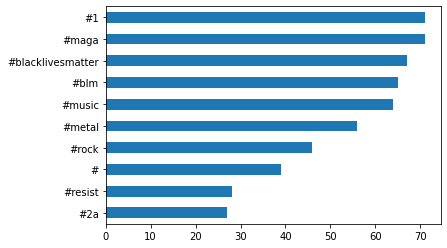

In [ ]:
hash_tag_counter(ffdp_hash_corpus).plot(kind='barh').invert_yaxis()

#### Rezz Hash Tags

In [ ]:
rezz_hash_corpus = df_corpus_maker(rezz_followers_df, 'clean_w_hashtags')
hash_tag_counter(rezz_hash_corpus)

#blm                 197
#blacklivesmatter    192
#edm                  97
#bitcoin              95
#nft                  84
#1                    79
#crypto               48
#music                47
#plur                 41
#dj                   37
dtype: int64

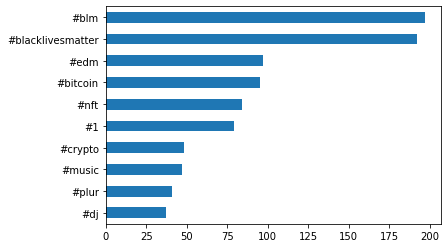

In [ ]:
hash_tag_counter(rezz_hash_corpus).plot(kind='barh').invert_yaxis()

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [ ]:
def title_word_counter(series_):
    # all titles have '_' as a whitespace holder
    series_ = series_.str.split('_')

    title_corpus = []
    for row in series_:
        title_corpus.extend(row)

    return pd.Series(title_corpus).value_counts()[:10]

#### FFDP Song Titles

In [ ]:
title_word_counter(ffdp_lyrics_df['Title'])

The        5
Of         2
To         2
See        1
Fiction    1
Never      1
Enough     1
From       1
Out        1
Nowhere    1
dtype: int64

#### Rezz Song Titles

In [ ]:
title_word_counter(rezz_lyrics_df['Title'])

Of             3
Death          2
Head           1
In             1
Sacrificial    1
Paper          1
Walls          1
Out            1
My             1
Lost           1
dtype: int64

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


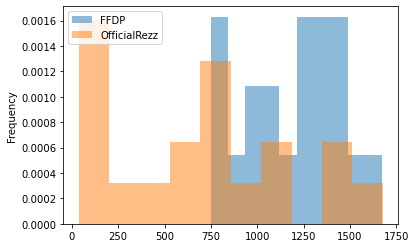

In [ ]:
# count length of tokens in description
ffdp_lyrics_df['Dirty_Len'] = ffdp_lyrics_df.loc[:,'Lyrics'].apply(len)
rezz_lyrics_df['Dirty_Len'] = rezz_lyrics_df.loc[:,'Lyrics'].apply(len)

lyrics_concat = pd.concat([ffdp_lyrics_df[['Artist','Dirty_Len']],
                           rezz_lyrics_df[['Artist','Dirty_Len']]])
lyrics_concat.groupby('Artist')['Dirty_Len'].plot(kind="hist",density=True,alpha=0.5,legend=True);

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: "Matches Unicode whitespace characters (which includes [ \t\n\r\f\v]"
